# FPGA Visuals

In [31]:
# Imports
%matplotlib notebook

import os
import random
from collections import defaultdict
import sys
import numpy as np
from scipy import spatial
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

get_colors = lambda length: [color.reshape(1, -1) for color in plt.get_cmap('Spectral')(np.linspace(0, 1.0, length))]

In [95]:
pred_folder = '/Users/jeffchenchengyi/Downloads/sinx_Nov-04-2019-19:24:58'
X_test = np.load('/Users/jeffchenchengyi/Downloads/X_test.npy')
y_preds = defaultdict()
for pred in os.listdir(pred_folder):
    y_preds[int(pred.split('_')[0][3:])] = np.load(os.path.join(pred_folder, pred)).flatten()

In [96]:
predictions = sorted(list(zip(y_preds.items(), get_colors(len(y_preds)))), key=lambda x: x[0])

<IPython.core.display.Javascript object>


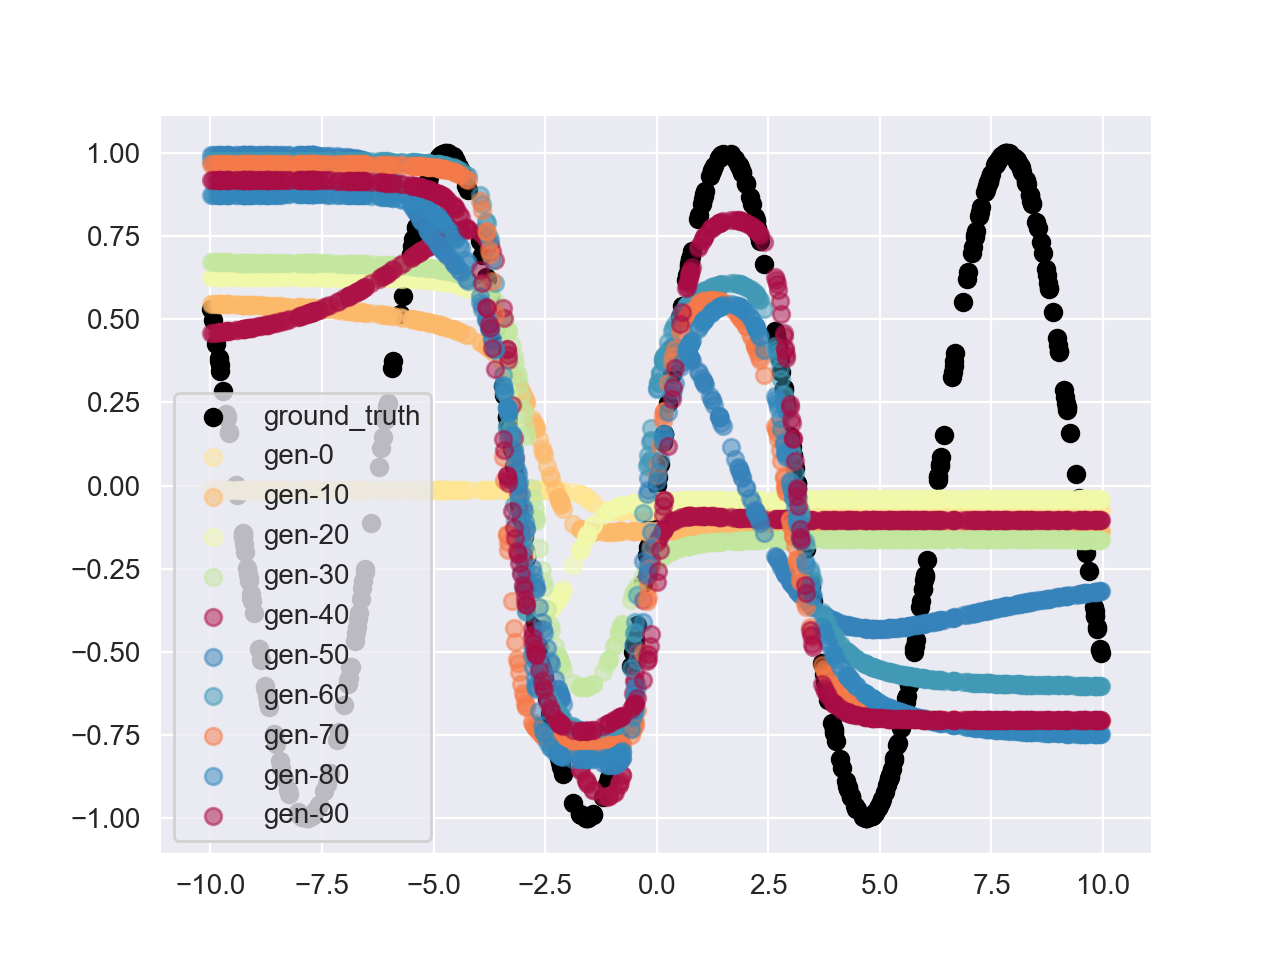

In [97]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_test, np.sin(X_test), c='black', label='ground_truth')
for (idx, pred), color in predictions[::10]:
    ax.scatter(x=X_test, y=pred, c=color, alpha=0.5, label='gen-'+str(idx))
    
plt.legend()
plt.show();

## Animate

<IPython.core.display.Javascript object>


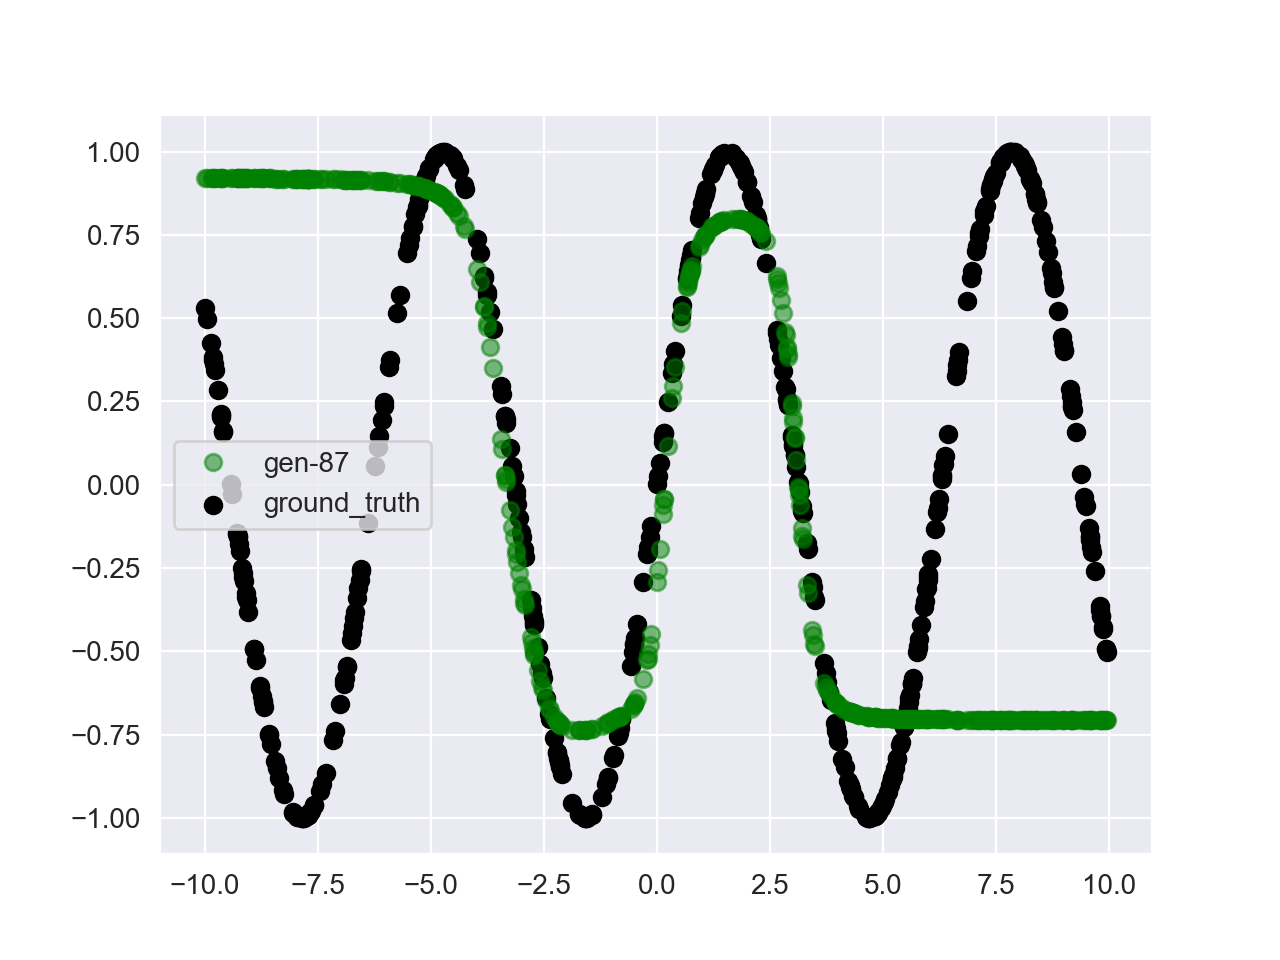

In [99]:
import matplotlib.animation as animation

fig, ax = plt.subplots(1, 1)

ax.scatter(X_test, np.sin(X_test), c='black', label='ground_truth')
x = X_test
ind, = ax.plot(x, predictions[0][0][1], 
               c='g', 
               alpha=0.5, 
               marker='o', 
               linestyle='', 
               label='gen-'+str(0))

def animate(gen_idx):
    ind.set_ydata(predictions[gen_idx][0][1])  # update the data
    ind.set_label('gen-'+str(gen_idx))
    plt.legend()
    return ind,


# Init only required for blitting to give a clean slate.
def init():
    ind.set_ydata(np.ma.array(x, mask=True))
    return ind,

ani = animation.FuncAnimation(fig=fig, 
                              func=animate, 
                              frames=np.arange(0, 100), init_func=init,
                              interval=200, blit=True, repeat=True)

# Set up formatting for the movie files
ani.save('sinx_evolve.gif', writer=animation.PillowWriter(fps=60), dpi=500)

plt.show();

## Get halloffame weights

In [5]:
from deap import base, creator
import pickle

with open('/Users/jeffchenchengyi/Downloads/checkpoint_gen99.pkl', "rb") as cp_file:
    # Define objective, individuals, population, and evaluation
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)
    cp = pickle.load(cp_file)

In [6]:
cp['halloffame']

Individual([  4.04328663,   1.11338868,   4.1631166 ,  19.74560445,
             -6.98033445,  -4.32001898, -18.22229941, -11.75266924,
              0.43140683,   3.94655038, -18.07668021,  14.10658051,
            -12.53055102,   8.68717768,   3.46077395,  -6.94085211,
              5.89705142,  -0.0590239 ,  -5.72210905,   4.86738172,
             10.91116656,   1.34905606,   0.39628391,  -1.8601637 ,
              1.32740365,  -6.62087958,   5.78948197, -14.32992793,
             -5.33588878,   1.88278922,   5.3924112 ,  -1.10085685,
             -2.10248628,  -3.16275186,  -2.46503209,  11.46161079,
             -6.21487409,  -3.68086672,   2.93324835,   6.83244402,
              9.13269694,  -7.0292818 ,  14.53486733,  -7.73686511,
              4.22463241,  -9.30633346,  -2.65517637, -21.36740975,
             -5.54973893,   0.76608536,  -0.90076475,  -3.88875275,
             -4.17503134])